# 기계학습 
## 기계학습이란 


* 인간의 지능을 모방하려는 시도 
* 따로 열심히 프로그래밍 안하고, 컴퓨터가 알아서 해주면 좋겠다. 
![](./img/ml_idea.jpg)
## 기계학습의 종류


* Supervised learning (지도학습)
 * 답안지가 있다. 
 * 예
   * 개체들의 유전형 : 병발생여부 
   * 농장 블럭의 토양 프로파일 : 각 블럭의 벼 수량 
 * 지도학습은 궁극적으로 입력값이 주어지면 추정된 답을 돌려주는 모델이 된다. 
 * Classification, Regression 이 해당됨
* Unsupervised learning (비지도학습)
 * 답안지가 없다.
 * 앞 예들에서 우측부분이 없음
 * 비지도 학습은 데이터들을 군집화 (Clustering) 한다. 
 * 군집을 기준으로 사람이 labeling을 하고 지도학습을 돌리는 Semi-supervised learning전략이 존재함.
* reinforcement learning (강화학습)
 * 게임과 같은 룰이 존재
 * 룰에 따라야 하는 Agent존재 
 * Agent는 sensor가 있음 
 * 시간에 따른 sensor 값을 받음 
 * Agent는 판단을 하고 움직임 
 * 게임룰에 따라 최고점을 내도록 훈련 
 * 자동항법,자동운전 등등 

## Supervised learning 

In [11]:
## classifcation 
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np

In [2]:
d = load_breast_cancer()

In [4]:
df_bc = pd.DataFrame(data=d.data,columns=d.feature_names)

In [5]:
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


![](./img/traintestsplit.jpg)

In [6]:
X = d.data
Y = d.target

In [7]:
X.shape,Y.shape

((569, 30), (569,))

In [8]:
# 모델 훈련은 주어진 데이터를 훈련세트 테스트세트로 뽀개는것 부터 시작한다. 
# 다음 함수는 쉽게 뽀개기 위함 
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [13]:
# 어떻게 뽀개지는지 확인하자 
list(y_train).count(0),list(y_train).count(1)

(160, 266)

In [14]:
list(y_test).count(0),list(y_test).count(1)

(52, 91)

In [15]:
list(Y).count(0),list(Y).count(1)

(212, 357)

In [18]:
# 이렇게 준비된 데이터를 통해서 분류를 해보자. 
# 분류 방법은 Random Forest 알고리즘 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(X_train,y_train)

In [20]:
# 얼마나 잘 예측 되었는가? 
rf.score(X_test,y_test)

0.9440559440559441

In [27]:
# score의 의미는? 
y_predict = rf.predict(X_test)
print (len(np.nonzero(y_predict == y_test)[0]) / len(y_predict))

0.9440559440559441


In [70]:
# Iris data를 이용해서 품종을 분류하는 코드를 작성해보자 

In [28]:
## Regression 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [30]:
print (diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [35]:
df_dia = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)

In [36]:
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [52]:
X = diabetes.data[:,2:3] 
Y = diabetes.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lr.score(X_test,y_test) # 회귀의 경우는 score값은 R2 값을 말한다. 

0.2925822944275195

In [64]:
y_pred = lr.predict(X_test)

In [65]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error : 예측값과 실제값을 뺀값을 제곱한것을 모두 더하고 평균낸것. 예측이 틀린정도가 크면 클수록 값이 커짐. 
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [951.88330173]
Mean squared error: 4361.66
R2 score: 0.29


![](./img/r2_fig.JPG)

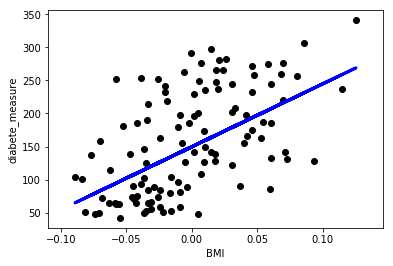

In [68]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('diabete_measure')
plt.show()

In [69]:
## diabete data 모두 사용해서 linear regression 기반 예측 모델을 작성해보자 

In [95]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=2000)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.40615765485697053

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.3323315273478431

In [116]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=2000)
etr.fit(X_train,y_train)
etr.score(X_test,y_test)

0.42681346380908386

In [118]:
# 차원 축소
# PCA 

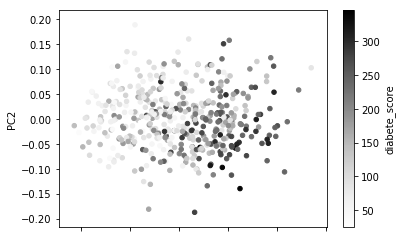

In [134]:
from sklearn.decomposition import PCA

pca        = PCA(n_components=2)
X_pca      = pca.fit_transform(X_all)
df_dia_pca = pd.DataFrame(data=X_pca,columns=['PC1','PC2'])

df_dia_pca['diabete_score'] = diabetes.target
df_dia_pca.plot(kind='scatter',x='PC1',y='PC2',c='diabete_score')
plt.show()

In [148]:
lr = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X_pca,Y)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.4069961778662658

In [135]:
from sklearn.manifold import TSNE

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [153]:
tsne = TSNE(n_components=2,n_iter=2000)

In [154]:
X_tsne = tsne.fit_transform(X_all)

In [155]:
df_dia_tsne = pd.DataFrame(data=X_tsne,columns=['TC1','TC2'])

In [156]:
df_dia_tsne['diabete_score'] = diabetes.target

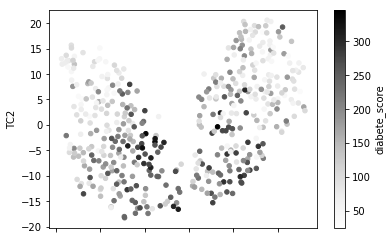

In [157]:
df_dia_tsne.plot(kind='scatter',x='TC1',y='TC2',c='diabete_score')
plt.show()

In [159]:
# PCA로 breast cancer dataset을 PC1, PC2로 나눠서 scatter plot을 그려보자 

In [160]:
# 비지도학습

In [161]:
from sklearn.datasets import load_wine

In [162]:
d = load_wine()

In [163]:
print(d.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [164]:
df_wine = pd.DataFrame(data=d.data, columns=d.feature_names)

In [165]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [166]:
df_wine['class'] = d.target

In [172]:
from collections import Counter
Counter(df_wine['class'])

Counter({0: 59, 1: 71, 2: 48})

In [173]:
X = d.data

In [195]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [196]:
X = scale(X)

In [197]:
km = KMeans(n_clusters=3)

In [198]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [199]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [210]:
def reassign_label(label):
    i = 0 
    dic = {}
    for l in label:
        try:
            _ = dic[l]
        except KeyError:
            dic[l] = i
            i += 1 
    predicted_label = np.array([dic[x] for x in label])
    return predicted_label

In [211]:
reassign_label(km.labels_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [208]:
d.target == predicted_label

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,

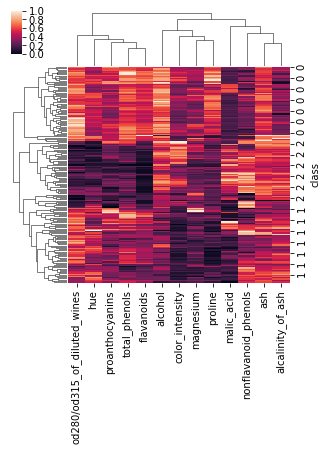

In [326]:
import seaborn as sb
df_wine_ix = df_wine.set_index('class')
sb.clustermap(df_wine_ix,col_cluster=True,standard_scale=1,method='complete',figsize=(5,5))

In [275]:
# PCA를 더해보자

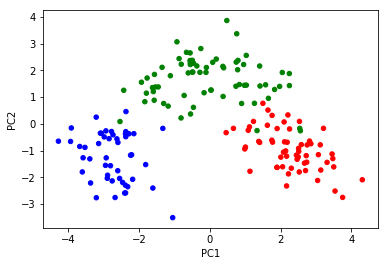

In [327]:
pca = PCA(n_components=2)

X_pca                = pca.fit_transform(X)
df_wine_pca          = pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_wine_pca['class'] = d.target

color_dic = {0:'r',1:'g',2:'b'}
df_wine_pca.plot(kind='scatter',x='PC1',y='PC2',c=df_wine_pca['class'].map(color_dic))
plt.show()